<a href="https://colab.research.google.com/github/savastakan/codes/blob/main/hitit_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pathlib
data_directory = pathlib.Path("/content/drive/MyDrive/Projeler/hitit_projesi/dataset_with_train_test/train")

In [ ]:
img_height,img_width=280, 280
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=42,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=42,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3930 files belonging to 191 classes.
Using 3144 files for training.
Found 3930 files belonging to 191 classes.
Using 786 files for validation.


In [ ]:
model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(280,280,3), pooling='avg',classes=191, weights='imagenet')

for each_layer in pretrained_model.layers:
        each_layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(191, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
99/99 [==============================] - 690s 6s/step - loss: 3.9990 - accuracy: 0.1762 - val_loss: 3.5331 - val_accuracy: 0.2239
Epoch 2/10
99/99 [==============================] - 31s 296ms/step - loss: 2.9481 - accuracy: 0.3441 - val_loss: 3.1154 - val_accuracy: 0.2837
Epoch 3/10
99/99 [==============================] - 30s 291ms/step - loss: 2.3230 - accuracy: 0.4523 - val_loss: 2.9278 - val_accuracy: 0.3346
Epoch 4/10
99/99 [==============================] - 32s 304ms/step - loss: 1.8293 - accuracy: 0.5534 - val_loss: 2.7660 - val_accuracy: 0.3791
Epoch 5/10
99/99 [==============================] - 30s 289ms/step - loss: 1.4180 - accuracy: 0.6473 - val_loss: 2.6417 - val_accuracy: 0.4186
Epoch 6/10
99/99 [==============================] - 31s 294ms/step - loss: 1.1184 - accuracy: 0.7128 - val_loss: 2.5616 - val_accuracy: 0.4491
Epoch 7/10
99/99 [==============================] - 32s 294ms/step - loss: 0.8643 - accuracy: 0.7878 - val_loss: 2.6248 - val_accuracy: 0.4567
E

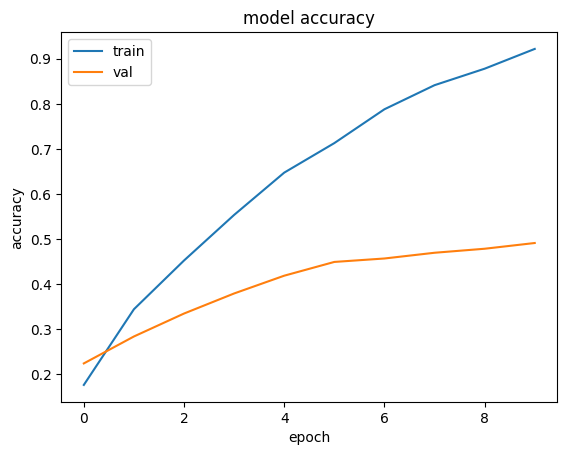

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()